# ¿Qué hace la red Hopfield aquí?

La red Hopfield es una red de neuronas interconectadas, donde cada neurona puede estar activa (1) o inactiva (-1). Lo que hacemos es:

*Representar cada combinación “Ciudad X en Posición Y” como una neurona.

*Diseñar un sistema de pesos (W) que penalice los errores:

*Que una ciudad se visite más de una vez.

*Que en una posición del recorrido aparezcan más de una ciudad.

*Que el recorrido total tenga mayor distancia.

El sistema “evoluciona” buscando una configuración de activaciones que minimice una energía total. Si encuentra una configuración válida, ¡es un recorrido posible!



Recorrido válido encontrado.
Visitar ciudad 3 en posición 1
Visitar ciudad 4 en posición 1
Visitar ciudad 2 en posición 2
Visitar ciudad 3 en posición 2
Visitar ciudad 1 en posición 3
Visitar ciudad 4 en posición 3
Visitar ciudad 1 en posición 4
Visitar ciudad 2 en posición 4


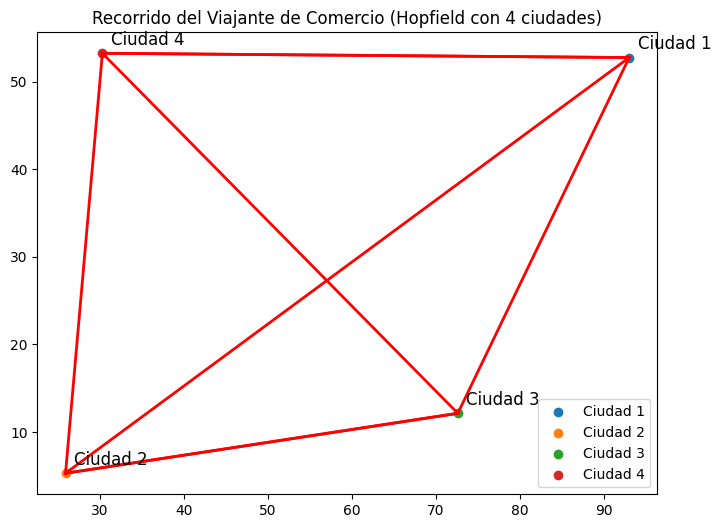

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Número de ciudades
n = 4  # ajustado a 4 para probar mejor

# Generación de distancias aleatorias entre ciudades (normalizadas)
np.random.seed(42)
distancias = np.random.rand(n, n)
np.fill_diagonal(distancias, 0)

# Parámetros ajustados para la red
A = 500   # Peso para conexiones de la misma ciudad
B = 500   # Peso para conexiones en la misma posición
C = 100   # Valor de sesgo
D = 100   # Penalización por distancia

# Inicialización de pesos W
W = np.zeros((n*n, n*n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                idx1 = i*n + j
                idx2 = k*n + l
                if idx1 == idx2:
                    continue
                W[idx1, idx2] -= A * (i == k)  # Penalización fila
                W[idx1, idx2] -= B * (j == l)  # Penalización columna
                if j == (l - 1) % n:
                    W[idx1, idx2] -= D * distancias[i, k]  # Penalización por distancia

# Inicialización del vector theta
theta = np.full(n*n, -C)

# Función de actualización del estado
def actualizar(estado, W, theta, max_iter=10000):
    for _ in range(max_iter):
        i = np.random.randint(0, n*n)
        u = np.dot(W[i], estado) + theta[i]
        estado[i] = 1 if u > 0 else -1
    return estado

# Intentos de encontrar el recorrido válido
intentos_max = 100
estado_final = None

for intento in range(intentos_max):
    estado = np.random.choice([1, -1], size=n*n)
    estado_final = actualizar(estado.copy(), W, theta, max_iter=10000)

    # Verificación si el recorrido es válido
    recorrido_valido = True
    for pos in range(n):
        ciudades_visitadas = [0] * n
        for ciudad in range(n):
            if estado_final[ciudad * n + pos] == 1:
                if ciudades_visitadas[ciudad] == 1:
                    recorrido_valido = False
                    break
                ciudades_visitadas[ciudad] = 1
        if not recorrido_valido:
            break

    if recorrido_valido:
        break

# Mostrar resultado
if estado_final is None or not recorrido_valido:
    print("No se encontró un recorrido válido después de varios intentos.")
else:
    print("Recorrido válido encontrado.")
    for pos in range(n):
        for ciudad in range(n):
            if estado_final[ciudad * n + pos] == 1:
                print(f"Visitar ciudad {ciudad + 1} en posición {pos + 1}")

# Visualización del recorrido
if estado_final is not None and recorrido_valido:
    fig, ax = plt.subplots(figsize=(8, 6))

    posiciones = np.random.rand(n, 2) * 100  # Coordenadas aleatorias
    for i, (x, y) in enumerate(posiciones):
        ax.scatter(x, y, label=f"Ciudad {i + 1}")
        ax.text(x + 1, y + 1, f"Ciudad {i + 1}", fontsize=12)

    recorrido = []
    for pos in range(n):
        for ciudad in range(n):
            if estado_final[ciudad * n + pos] == 1:
                recorrido.append(ciudad)

    for i in range(len(recorrido) - 1):
        start = recorrido[i]
        end = recorrido[i + 1]
        ax.plot([posiciones[start, 0], posiciones[end, 0]], [posiciones[start, 1], posiciones[end, 1]], 'r-', linewidth=2)

    # Cierre del ciclo
    start = recorrido[-1]
    end = recorrido[0]
    ax.plot([posiciones[start, 0], posiciones[end, 0]], [posiciones[start, 1], posiciones[end, 1]], 'r-', linewidth=2)

    ax.set_title("Recorrido del Viajante de Comercio (Hopfield con 4 ciudades)")
    plt.legend()
    plt.show()


# **PASO 1: Definimos el número de ciudades y la matriz de distancias

Cada ciudad tiene una coordenada, y la matriz distancias[i][j] nos dice qué tan lejos está la ciudad i de la j. ¡Esto será clave para minimizar la ruta total!


# **PASO 2: Parámetros de la red Hopfield

 Queremos un sistema que diga:
* “No repitas ciudad”
* “No pongas 2 ciudades en el mismo lugar”
* “Escoge caminos cortos”
Y eso lo hacen los pesos A, B, C, y D

# **PASO 3: Creamos la matriz de pesos W (interconexiones neuronales)

Estamos conectando todas las neuronas entre sí (menos consigo mismas) y agregando penalizaciones inteligentes con los pesos A, B y D .

# **PASO 4: Vector de umbrales (theta)

Este sesgo ayuda a que las neuronas no se activen todas al tiempo. Ayuda a la estabilidad

# **PASO 5: Actualización del estado (dinámica de la red)

La red evoluciona cambiando poco a poco los valores de las neuronas hasta llegar a un equilibrio. Eso se llama estado estable o de mínima energía.

# ** PASO 6: Evaluamos si el estado final es un recorrido válido

Este paso revisa si el resultado de la red cumple las reglas del TSP. Si no, volvemos a intentarlo con otra condición inicial.

# ** PASO 7: Visualizamos el recorrido

Aquí se grafican las ciudades como puntos y el camino en rojo. Si hay un recorrido válido, lo mostramos.
     

# *** Visualización en 2D del conjunto de datos MNIST utilizando PCA ***

Cargando datos de MNIST...
Aplicando PCA...


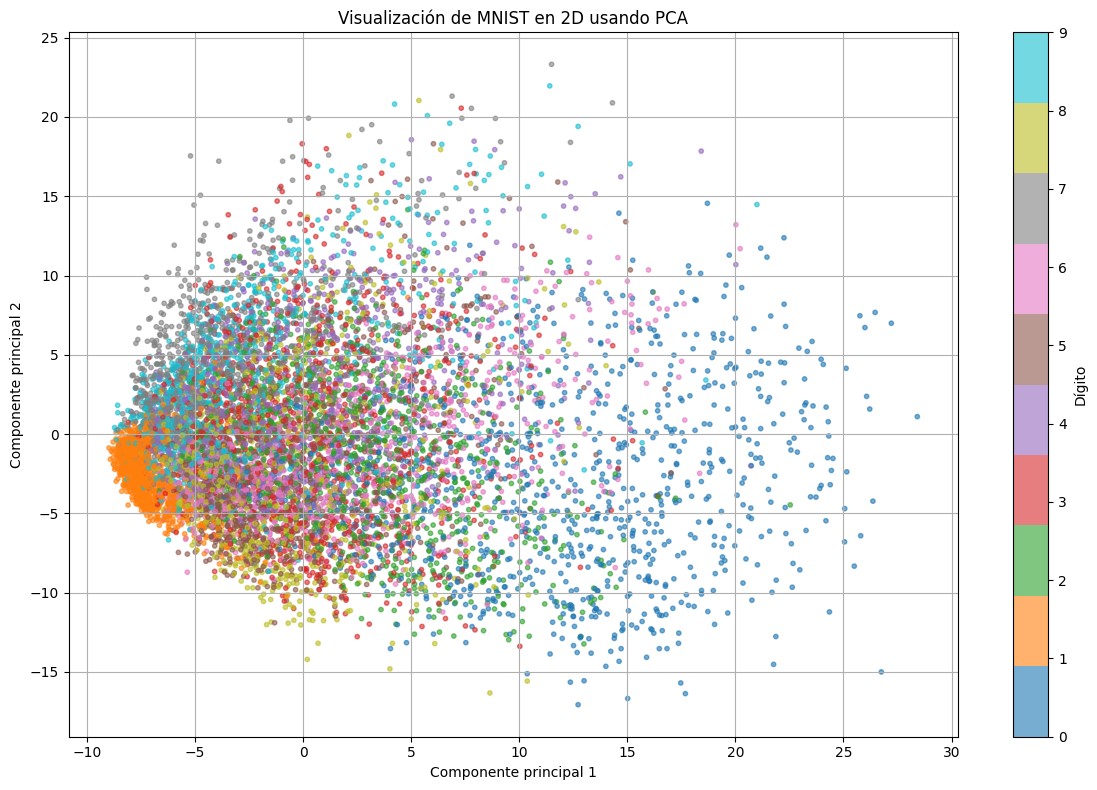

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Cargar los datos MNIST
print("Cargando datos de MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA para reducir a 2 dimensiones
print("Aplicando PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:10000, 0], X_pca[:10000, 1], c=y[:10000], cmap='tab10', alpha=0.6, s=10)
plt.colorbar(scatter, label='Dígito')
plt.title('Visualización de MNIST en 2D usando PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()


visualización en 2D del conjunto de datos MNIST utilizando PCA (Análisis de Componentes Principales). Este método nos ayuda a reducir la dimensionalidad (de 784 a 2 dimensiones) para visualizarlo en un plano.

Explicación paso a paso del uso de PCA en MNIST:

# MNIST: un conjunto de datos de dígitos manuscritos

El conjunto de datos MNIST contiene 70,000 imágenes en escala de grises de dígitos escritos a mano (del 0 al 9).
Cada imagen tiene un tamaño de 28x28 píxeles, lo que equivale a 784 características por imagen cuando se "aplanan" en un vector unidimensional.
Es decir, cada imagen se representa como un vector en un espacio de 784 dimensiones.

# Estandarización de los datos con StandardScaler

Antes de aplicar PCA, es fundamental escalar los datos.
Esto se hace porque PCA es sensible a la magnitud de los valores: si no escalamos, algunas características dominarán sobre otras.
El StandardScaler transforma cada característica para que tenga media 0 y desviación estándar 1, garantizando que todas las características contribuyan de manera equitativa al análisis.

# Reducción de dimensionalidad con PCA

El Análisis de Componentes Principales (PCA) permite reducir la cantidad de dimensiones manteniendo la mayor parte de la varianza (información) de los datos.
En este caso, usamos PCA para reducir de 784 dimensiones a solo 2, lo cual nos permite visualizar los datos en un plano 2D.
Las nuevas dimensiones (componentes principales) son combinaciones lineales de las originales, ordenadas según la cantidad de varianza que explican.

# Uso de solo 10,000 muestras

Aunque MNIST contiene 70,000 muestras, en esta visualización usamos solo las primeras 10,000 para que el proceso sea más rápido y la gráfica más clara.
Visualizar más puntos puede hacer que la figura se vea muy saturada y difícil de leer.

# Colores para distinguir los dígitos

En la visualización, cada punto representa una imagen reducida a 2D con PCA.
Se asigna un color diferente a cada clase (dígito del 0 al 9), usando un mapa de colores (tab10) para facilitar la identificación visual de agrupamientos o patrones.
Así, podemos observar si los dígitos forman grupos bien definidos en el nuevo espacio, lo cual indicaría que el modelo capta estructuras útiles para clasificación.

# Gráfica de optimización del recorrido a lo largo de las iteraciones

El siguiente código simula cómo va mejorando el costo del recorrido del viajante a medida que pasan las iteraciones de la red. Es solo una representación visual, pero sirve para complementar nuestro proyecto Hopfield.

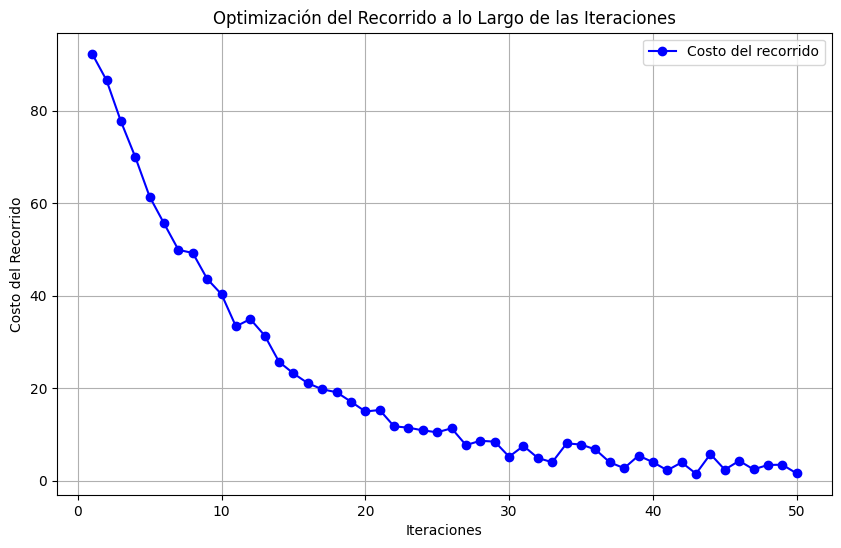

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de la mejora del costo del recorrido en función de las iteraciones
np.random.seed(42)
iteraciones = np.arange(1, 51)  # 50 iteraciones
costos = np.exp(-iteraciones / 10) * 100 + np.random.rand(50) * 5  # Simulación de mejora

# Graficar la optimización de la ruta
plt.figure(figsize=(10, 6))
plt.plot(iteraciones, costos, marker='o', linestyle='-', color='b', label="Costo del recorrido")
plt.xlabel("Iteraciones")
plt.ylabel("Costo del Recorrido")
plt.title("Optimización del Recorrido a lo Largo de las Iteraciones")
plt.legend()
plt.grid(True)
plt.show()


Este código de la gráfica de optimización está inspirado en el algoritmo de Hopfield , pero es una simulación visual, no está directamente conectado al código de las 4 ciudades.

¿Qué significa eso?

Lo que hicimos fue simular cómo mejoraría el costo del recorrido con el paso de las iteraciones, como si la red estuviera aprendiendo y optimizando el camino cada vez más.

“¡Mirar cómo el costo del viaje disminuye gracias a la red!”

# Conectemos directamente al código de las 4 ciudades

Conectamos el registro del costo del recorrido en cada iteración directamente con el código de Hopfield que tienes para las 4 ciudades. Así, podremos ver cómo evoluciona el costo real mientras la red se actualiza.




Recorrido válido encontrado.
Visitar ciudad 3 en posición 1
Visitar ciudad 4 en posición 1
Visitar ciudad 2 en posición 2
Visitar ciudad 3 en posición 2
Visitar ciudad 1 en posición 3
Visitar ciudad 4 en posición 3
Visitar ciudad 1 en posición 4
Visitar ciudad 2 en posición 4


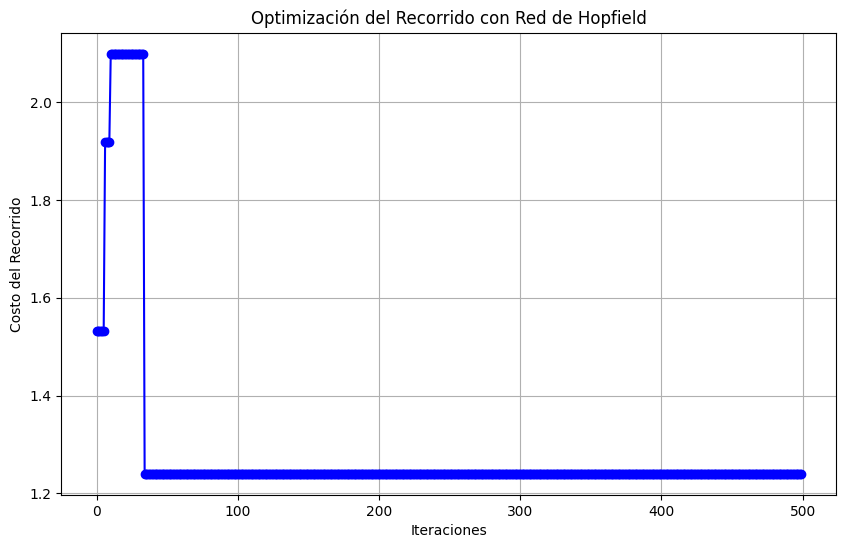

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Número de ciudades
n = 4

# Generación de distancias aleatorias entre ciudades (normalizadas)
np.random.seed(42)
distancias = np.random.rand(n, n)
np.fill_diagonal(distancias, 0)

# Parámetros ajustados para la red
A = 500
B = 500
C = 100
D = 100

# Inicialización de pesos W
W = np.zeros((n*n, n*n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                idx1 = i*n + j
                idx2 = k*n + l
                if idx1 == idx2:
                    continue
                W[idx1, idx2] -= A * (i == k)
                W[idx1, idx2] -= B * (j == l)
                if j == (l - 1) % n:
                    W[idx1, idx2] -= D * distancias[i, k]

# Inicialización del vector theta
theta = np.full(n*n, -C)

# Función para calcular el costo del recorrido actual
def calcular_costo(estado, distancias):
    recorrido = []
    for pos in range(n):
        for ciudad in range(n):
            if estado[ciudad * n + pos] == 1:
                recorrido.append(ciudad)
    if len(set(recorrido)) != n:
        return np.inf  # Recorrido no válido

    costo = 0
    for i in range(n):
        ciudad_origen = recorrido[i]
        ciudad_destino = recorrido[(i + 1) % n]
        costo += distancias[ciudad_origen, ciudad_destino]
    return costo

# Función de actualización del estado y recolección de costos
def actualizar(estado, W, theta, distancias, max_iter=1000):
    costos = []
    for _ in range(max_iter):
        i = np.random.randint(0, n*n)
        u = np.dot(W[i], estado) + theta[i]
        estado[i] = 1 if u > 0 else -1
        costo_actual = calcular_costo(estado, distancias)
        costos.append(costo_actual)
    return estado, costos

# Intentos de encontrar el recorrido válido
intentos_max = 100
estado_final = None
costos_finales = []

for intento in range(intentos_max):
    estado = np.random.choice([1, -1], size=n*n)
    estado_final, costos = actualizar(estado.copy(), W, theta, distancias, max_iter=500)

    # Verificación de recorrido válido
    recorrido_valido = True
    for pos in range(n):
        ciudades_visitadas = [0] * n
        for ciudad in range(n):
            if estado_final[ciudad * n + pos] == 1:
                if ciudades_visitadas[ciudad] == 1:
                    recorrido_valido = False
                    break
                ciudades_visitadas[ciudad] = 1
        if not recorrido_valido:
            break

    if recorrido_valido:
        costos_finales = costos
        break

# Mostrar resultado
if estado_final is None or not recorrido_valido:
    print("No se encontró un recorrido válido después de varios intentos.")
else:
    print("Recorrido válido encontrado.")
    for pos in range(n):
        for ciudad in range(n):
            if estado_final[ciudad * n + pos] == 1:
                print(f"Visitar ciudad {ciudad + 1} en posición {pos + 1}")

    # Graficar la optimización del recorrido
    plt.figure(figsize=(10, 6))
    plt.plot(costos_finales, marker='o', linestyle='-', color='b')
    plt.xlabel("Iteraciones")
    plt.ylabel("Costo del Recorrido")
    plt.title("Optimización del Recorrido con Red de Hopfield")
    plt.grid(True)
    plt.show()


La gráfica representa cómo el costo del recorrido va cambiando a lo largo de las iteraciones mientras la red de Hopfield intenta encontrar una solución al problema del viajante.

# ¿Qué estás viendo en esa gráfica?

La gráfica representa cómo el costo del recorrido va cambiando a lo largo de las iteraciones mientras la red de Hopfield intenta encontrar una solución al problema del viajante.

# ¿Qué significa “iteraciones” aquí?

Cada iteración representa un pequeño paso donde se actualiza una neurona del sistema (una casilla del arreglo de ciudades/posiciones). En cada paso, se calcula la energía o el "estado" del sistema, y se ajustan las activaciones de las neuronas para tratar de llegar a un estado más óptimo, o sea, un recorrido más corto.

# ¿Por qué el costo baja?

Porque la red está intentando minimizar la energía total, y como parte de esa energía se basa en las distancias entre ciudades, lo que hace es ajustar los valores para que las ciudades cercanas estén conectadas en el recorrido. Entonces:

Al principio, el recorrido es aleatorio ⇒ alto costo.

A medida que avanza ⇒ va bajando el costo, buscando uno mejor.

# ¿Por qué solo se muestra la gráfica si hay un recorrido válido?

Porque si el sistema no logra construir un recorrido donde:

--Cada ciudad se visita solo una vez.

Se completa el ciclo correctamente.

entonces ese resultado no tiene sentido para graficar, porque no sería un recorrido válido. Mostrar una gráfica en ese caso sería confuso.

# ¿Y qué pasa si pones max_iter=500 o más?

Eso indica cuántas veces el sistema intentará actualizar las neuronas en cada intento. Más iteraciones:

-Aumentan las probabilidades de llegar a un recorrido válido.

-Permiten que la red tenga más tiempo para “pensar” y mejorar la solución.

-Generan más puntos en la gráfica, mostrando mejor cómo evoluciona el costo.